K Means Clustering is an unsupervised learning algorithm that tries to cluster data based on their similarity. Unsupervised learning means that there is no outcome to be predicted, and the algorithm just tries to find patterns in the data. In k means clustering, we have the specify the number of clusters we want the data to be grouped into. The algorithm randomly assigns each observation to a cluster, and finds the centroid of each cluster. Then, the algorithm iterates through two steps:

- Reassign data points to the cluster whose centroid is closest. 
- Calculate new centroid of each cluster. 

These two steps are repeated till the within cluster variation cannot be reduced any further. The within cluster variation is calculated as the sum of the euclidean distance between the data points and their respective cluster centroids.

#### Import Libraries

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Create some Data

In [38]:
from sklearn.datasets import make_blobs

In [39]:
# Create Data
data = make_blobs(n_samples=200, n_features=2, 
                           centers=4, cluster_std=1.8,random_state=101)

#### Visualizing the Data

In [43]:
# data

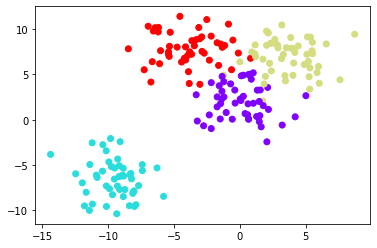

In [41]:
plt.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

#### Creating the clusters

In [20]:
from sklearn.cluster import KMeans

In [21]:
kmeans = KMeans(n_clusters=4)

In [22]:
kmeans.fit(data[0])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [23]:
kmeans.cluster_centers_

array([[-9.46941837, -6.56081545],
       [-0.0123077 ,  2.13407664],
       [-4.13591321,  7.95389851],
       [ 3.71749226,  7.01388735]])

In [24]:
kmeans.labels_

array([2, 3, 1, 3, 3, 0, 3, 1, 3, 1, 2, 1, 3, 3, 2, 1, 3, 1, 0, 2, 0, 1,
       1, 0, 2, 0, 0, 1, 3, 3, 2, 0, 3, 1, 1, 2, 0, 0, 0, 1, 0, 2, 2, 2,
       1, 3, 2, 1, 0, 1, 1, 2, 3, 1, 0, 2, 1, 1, 2, 3, 0, 3, 0, 2, 3, 1,
       0, 3, 3, 0, 3, 1, 0, 1, 0, 3, 3, 1, 2, 1, 1, 0, 3, 0, 1, 1, 1, 2,
       1, 0, 0, 0, 0, 1, 1, 0, 3, 2, 0, 3, 1, 0, 1, 1, 3, 1, 0, 3, 0, 0,
       3, 2, 2, 3, 0, 3, 2, 2, 3, 2, 1, 2, 1, 2, 1, 3, 2, 1, 0, 2, 2, 2,
       1, 0, 0, 2, 3, 2, 3, 1, 0, 3, 0, 2, 2, 3, 1, 0, 2, 2, 2, 2, 1, 3,
       1, 2, 3, 3, 3, 1, 3, 1, 1, 2, 0, 2, 1, 3, 2, 1, 3, 1, 2, 3, 1, 2,
       3, 3, 0, 3, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 3, 3, 2, 0, 1, 3, 3,
       0, 1], dtype=int32)

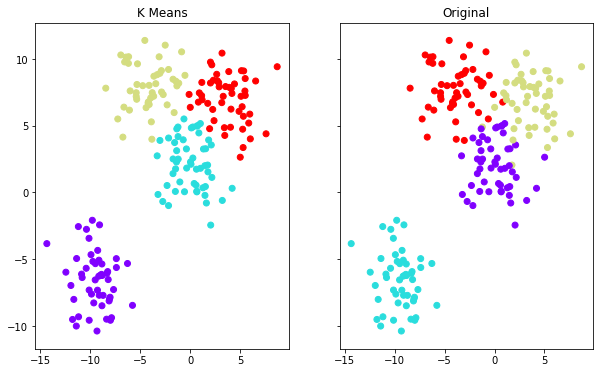

In [25]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

#### K-Means and Elbow Criterion

From now onwards, we would be using the Iris dataset, and see how K-means plays a part in classification

In [26]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

In [27]:
# Loads the iris dataset
iris = datasets.load_iris()

In [28]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

We will need to extract required components from the 'iris' object obtained in the previous step. Namely the features and corresponding flower class.

In [29]:
iris_data = pd.DataFrame(iris.data, columns=iris['feature_names'])
iris_target = pd.DataFrame(iris.target, columns=['target'])

The target/class variable obtained in the previous is encoded as integers. We will use some python and pandas trickery to obtain the actual class names.

In [30]:
# Map encoded target values to target names
def map_target(target_num):
    return iris.target_names[int(target_num)]

In [31]:
iris_target_name = iris_target.apply(map_target, axis = 1)

iris_target_name

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
5         setosa
6         setosa
7         setosa
8         setosa
9         setosa
10        setosa
11        setosa
12        setosa
13        setosa
14        setosa
15        setosa
16        setosa
17        setosa
18        setosa
19        setosa
20        setosa
21        setosa
22        setosa
23        setosa
24        setosa
25        setosa
26        setosa
27        setosa
28        setosa
29        setosa
         ...    
120    virginica
121    virginica
122    virginica
123    virginica
124    virginica
125    virginica
126    virginica
127    virginica
128    virginica
129    virginica
130    virginica
131    virginica
132    virginica
133    virginica
134    virginica
135    virginica
136    virginica
137    virginica
138    virginica
139    virginica
140    virginica
141    virginica
142    virginica
143    virginica
144    virginica
145    virginica
146    virginica
147    virgini

We will go ahead and fit a K-means model to the data. We will use 3 of the 4 features available. This will make it easier for us to visualize the results of the model.

#### Problem Statement

In [32]:
# Fit a K-Means model to the data

kmeans_3 = KMeans(n_clusters=3)

kmeans_iris = kmeans_3.fit(iris_data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']])

Below code allows us to visualize our K-Means model's results.

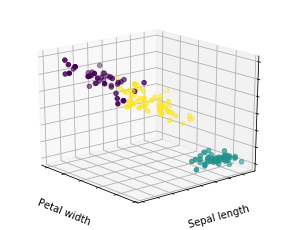

In [48]:
fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=140)

labels = kmeans_iris.labels_

ax.scatter(iris_data.iloc[:, 3], iris_data.iloc[:, 0], iris_data.iloc[:, 2], c = labels.astype(np.float))

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')

plt.show()

Next two lines show through summary statistics of actual classes and predicted clusters that how the algorithm clubbed together data points belonging to different classes.

In [34]:
print(pd.Series([(iris_target.loc[i][0], kmeans_iris.labels_[i]) for i in range(len(iris.target))]).value_counts())

(0, 1)    50
(1, 2)    45
(2, 0)    37
(2, 2)    13
(1, 0)     5
dtype: int64


#### Elbow criterion for finding optimum number of clusters

In unsupervised learning, you rarely get an output that’s 100 percent accurate because real-world data is rarely that simple.
Apart from simplicity of the dataset, the reason why above model performed so well was because we knew beforehand the optimum numbers of clusters, i.e. 3. Out in the wild, you won’t know how many clusters to choose (or any initialization parameter for other clustering algorithms). Such parameter-tuning is critical.

One of the methods for finding out the optimum number of clusters for K-Means algorithm is the elbow criterion.
The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (say, k from 1 to 10 in the examples above), and for each value of k calculate the sum of squared errors (SSE). Then, plot a line chart of the SSE for each value of k. If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best.
The idea is that we want a small SSE, but that the SSE tends to decrease toward 0 as we increase k (the SSE is 0 when k is equal to the number of data points in the dataset, because then each data point is its own cluster, and there is no error between it and the center of its cluster). So our goal is to choose a small value of k that still has a low SSE, and the elbow usually represents where we start to have diminishing returns by increasing k.

In [35]:
# Elbow criterion
def elbow_plot(data, maxK = 10, seed_centroids = None):
    """
        parameters:
        - data: pandas DataFrame (data to be fitted)
        - maxK (default = 10): integer (maximum number of clusters with which to run k-means)
        - seed_centroids (default = None ): float (initial value of centroids for k-means)
    """
    sse = {}

    for k in range(1, maxK):
        print("k: ", k)

        if seed_centroids is not None:
            seeds = seed_centroids.head(k)
            kmeans = KMeans(n_clusters=k, max_iter=500, n_init=100, random_state=0, init=np.reshape(seeds, (k,1))).fit(data)
            data["clusters"] = kmeans.labels_
        else:
            kmeans = KMeans(n_clusters=k, max_iter=300, n_init=100, random_state=0).fit(data)
            data["clusters"] = kmeans.labels_
        
        # Inertia: Sum of distances of samples to their closest cluster center
        sse[k] = kmeans.inertia_
    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()))
    plt.show()
    return

k:  1
k:  2
k:  3
k:  4
k:  5
k:  6
k:  7
k:  8
k:  9


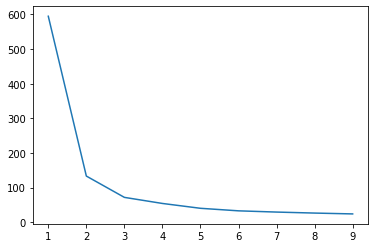

In [36]:
elbow_plot(iris_data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']], maxK = 10)

As we can see from the above plot, 3 looks like a good choice for number of clusters.

The elbow criterion doesn't always work well. In cases like this, we might try a different method for determining the optimal k, such as computing silhouette scores, or we might re-evaluate whether clustering is the right thing to do on our data.

#### Exercise -  Attempt to use KMeans Clustering to cluster Universities into to two groups, Private and Public.

It is very important to note, we actually have the labels for this data set, but we will NOT use them for the KMeans clustering algorithm, since that is an unsupervised learning algorithm.

dataset - College_Data.csv

### The Data

We will use a data frame with 777 observations on the following 18 variables.
* Private A factor with levels No and Yes indicating private or public university
* Apps Number of applications received
* Accept Number of applications accepted
* Enroll Number of new students enrolled
* Top10perc Pct. new students from top 10% of H.S. class
* Top25perc Pct. new students from top 25% of H.S. class
* F.Undergrad Number of fulltime undergraduates
* P.Undergrad Number of parttime undergraduates
* Outstate Out-of-state tuition
* Room.Board Room and board costs
* Books Estimated book costs
* Personal Estimated personal spending
* PhD Pct. of faculty with Ph.D.’s
* Terminal Pct. of faculty with terminal degree
* S.F.Ratio Student/faculty ratio
* perc.alumni Pct. alumni who donate
* Expend Instructional expenditure per student
* Grad.Rate Graduation rate